KNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd



# Replace this with your actual data loading code
# Assuming you have a list 'sentences' containing input sentences and 'labels' containing corresponding labels
# Make sure labels are encoded as integers (e.g., 0, 1, 2 for three classes)

# Example data loading (replace this with your actual data loading code)
def prepare_set(csvfile):
  train_set = pd.read_csv(csvfile)
  #print(train_set)
  train_set = train_set[(train_set['Emotion'] != '')]
  train_set = train_set[(train_set['Utterance'] != '')]
  #print(train_set)
  utterance_train = train_set.Utterance.values.tolist()
  sentiment_train = train_set.Sentiment.values.tolist()
  emotion_train = train_set.Emotion.values.tolist()
  for i in range(len(utterance_train)):
    utterance_train[i] = utterance_train[i].replace('\x92',"'")
    utterance_train[i] = utterance_train[i].replace('\x85',"...")
    utterance_train[i] = utterance_train[i].replace('\x91',"'")
    utterance_train[i] = utterance_train[i].replace('\x93',"\"")
    utterance_train[i] = utterance_train[i].replace('\x94',"\"")
    utterance_train[i] = utterance_train[i].replace('\x96',"-")
    utterance_train[i] = utterance_train[i].replace('\x97',"-")
  emotionlist = []
  for emotion in emotion_train:
    if emotion not in emotionlist:
      emotionlist.append(emotion)
  #print(len(emotionlist))
  #print(emotionlist)


  print(utterance_train)
  #label_dict = {"positive":0,"negative":1,"neutral":2}
  label_dict = {'neutral':0, 'surprise':1, 'fear':2, 'sadness':3, 'joy':4, 'disgust':5, 'anger':6}

  #labels = [label_dict[i] for i in sentiment_train]
  labels = [label_dict[i] for i in emotion_train]
  print(labels)
  return utterance_train,labels

train_set,train_labels = prepare_set('train_sent_emo.csv')
val_set,val_labels = prepare_set('dev_sent_emo.csv')
test_set,test_labels = prepare_set('test_sent_emo.csv')
print(len(train_set))


["also I was the point person on my company's transition from the KL-5 to GR-6 system.", "You must've had your hands full.", 'That I did. That I did.', "So let's talk a little bit about your duties.", 'My duties?  All right.', "Now you'll be heading a whole division, so you'll have a lot of duties.", 'I see.', "But there'll be perhaps 30 people under you so you can dump a certain amount on them.", 'Good to know.', 'We can go into detail', "No don't I beg of you!", "All right then, we'll have a definite answer for you on Monday, but I think I can say with some confidence, you'll fit in well here.", 'Really?!', 'Absolutely.  You can relax', 'But then who? The waitress I went out with last month?', 'You know? Forget it!', 'No-no-no-no, no! Who, who were you talking about?', "No, I-I-I-I don't, I actually don't know", 'Ok!', 'All right, well...', 'Yeah, sure!', 'Hey, Mon.', 'Hey-hey-hey. You wanna hear something that sucks.', 'Do I ever.', "Chris says they're closing down the bar.", 'No wa

In [ ]:
import re
def remove_tags(str):
  #s = "string. With. Punctuation?"
  result = re.sub(r'[^\w\s]','',str)
  return result

for i in range(len(train_set)):
  train_set[i] = remove_tags(train_set[i])

for i in range(len(val_set)):
  val_set[i] = remove_tags(val_set[i])

for i in range(len(test_set)):
  test_set[i] = remove_tags(test_set[i])

print(train_set)

['also I was the point person on my companys transition from the KL5 to GR6 system', 'You mustve had your hands full', 'That I did That I did', 'So lets talk a little bit about your duties', 'My duties  All right', 'Now youll be heading a whole division so youll have a lot of duties', 'I see', 'But therell be perhaps 30 people under you so you can dump a certain amount on them', 'Good to know', 'We can go into detail', 'No dont I beg of you', 'All right then well have a definite answer for you on Monday but I think I can say with some confidence youll fit in well here', 'Really', 'Absolutely  You can relax', 'But then who The waitress I went out with last month', 'You know Forget it', 'Nononono no Who who were you talking about', 'No IIII dont I actually dont know', 'Ok', 'All right well', 'Yeah sure', 'Hey Mon', 'Heyheyhey You wanna hear something that sucks', 'Do I ever', 'Chris says theyre closing down the bar', 'No way', 'Yeah apparently theyre turning it into some kinda coffee pla

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for i in range(len(train_set)):
  x = train_set[i]
  sennow = ""
  for word in x.split():
    if word not in (stop_words):
      if sennow == "":
        sennow += word
      else:
        sennow += " " + word
  train_set[i] = sennow

for i in range(len(val_set)):
  x = val_set[i]
  sennow = ""
  for word in x.split():
    if word not in (stop_words):
      if sennow == "":
        sennow += word
      else:
        sennow += " " + word
  val_set[i] = sennow

for i in range(len(test_set)):
  x = test_set[i]
  sennow = ""
  for word in x.split():
    if word not in (stop_words):
      if sennow == "":
        sennow += word
      else:
        sennow += " " + word
  test_set[i] = sennow




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(train_set)
print(val_set)
print(test_set)

['also I point person companys transition KL5 GR6 system', 'You mustve hands full', 'That I That I', 'So lets talk little bit duties', 'My duties All right', 'Now youll heading whole division youll lot duties', 'I see', 'But therell perhaps 30 people dump certain amount', 'Good know', 'We go detail', 'No dont I beg', 'All right well definite answer Monday I think I say confidence youll fit well', 'Really', 'Absolutely You relax', 'But The waitress I went last month', 'You know Forget', 'Nononono Who talking', 'No IIII dont I actually dont know', 'Ok', 'All right well', 'Yeah sure', 'Hey Mon', 'Heyheyhey You wanna hear something sucks', 'Do I ever', 'Chris says theyre closing bar', 'No way', 'Yeah apparently theyre turning kinda coffee place', 'Just coffee Where gonna hang', 'Got', 'Can I get beer', 'Hey pick roommate', 'You betcha', 'Is Italian guy', 'Ummm yeah right', 'Oh God oh God Poor Monica', 'What', 'What', 'He wrote poem', 'Look My vessel empty nothing inside', 'Now Ive touched 

In [ ]:
def getmax():
  totalset = train_set+val_set+test_set
  maxsentence = 0
  for i in range(len(totalset)):
    sentencelen = len(totalset[i])
    if sentencelen > maxsentence:
      maxsentence = sentencelen
  return sentencelen

print(getmax())

17


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Sample data (replace with your actual data)
#texts = ["I love this product!", "Not satisfied with the service.", "Amazing experience!", "Disappointed with the quality.","of course not","are you nuts"]
#labels = ["positive", "negative", "positive", "neutral","neutral","negative"]

# Convert labels to numerical values
#label_mapping = {"positive": 0, "negative": 1,"neutral":2}
#y = np.array([label_mapping[label] for label in labels])

# Split the data into training, validation, and testing sets
#X_train, X_temp, y_train, y_temp = train_test_split(texts, y, test_size=0.4, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = train_set
y_train = train_labels




X_val = val_set
y_val = val_labels

X_test = test_set
y_test = test_labels



# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)
smote = SMOTE(random_state=42)
X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Lists to store training and validation loss and accuracy
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []
epochs = 5
# Training loop

knn_classifier.fit(X_train_tfidf, y_train)

# Evaluate on training set
y_train_pred = knn_classifier.predict(X_train_tfidf)
train_acc = accuracy_score(y_train, y_train_pred)
#train_accuracy.append(train_acc)

# Evaluate on validation set
y_test_pred = knn_classifier.predict(X_test_tfidf)
test_acc = accuracy_score(y_test, y_test_pred)
#test_accuracy.append(test_acc)

print(test_acc)



0.27624521072796937


In [ ]:
!ls

best_model_lstm.h5  bilstm	      model_LSTM_word2vec.h5  test_sent_emo.csv
best_model_rnn.h5   dev_sent_emo.csv  model_RNN_word2vec.h5   train_sent_emo.csv


In [ ]:
import os
os.chdir('drive/MyDrive/sml_stuff')

Naive bayes

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

X_train = train_set
y_train = train_labels

X_val = val_set
y_val = val_labels

X_test = test_set
y_test = test_labels



# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
smote = SMOTE(random_state=42)
#print(X_train_tfidf)
#print(X_train_tfidf.shape)
#print(len(y_train))
X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)
#print("new")
#print(X_train_tfidf.shape)
#print(len(y_train))
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)
# Convert text data to TF-IDF features
#vectorizer = TfidfVectorizer()
#X_train_tfidf = vectorizer.fit_transform(X_train)
#X_test_tfidf = vectorizer.transform(X_test)

# Create and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)



Accuracy: 0.32911877394636013


In [ ]:
all_words = []

for eachsentence in train_set:
  words = eachsentence.split()
  all_words.append(words)

for eachsentence in val_set:
  words = eachsentence.split()
  all_words.append(words)

for eachsentence in test_set:
  words = eachsentence.split()
  all_words.append(words)

print(all_words)

[['also', 'I', 'point', 'person', 'companys', 'transition', 'KL5', 'GR6', 'system'], ['You', 'mustve', 'hands', 'full'], ['That', 'I', 'That', 'I'], ['So', 'lets', 'talk', 'little', 'bit', 'duties'], ['My', 'duties', 'All', 'right'], ['Now', 'youll', 'heading', 'whole', 'division', 'youll', 'lot', 'duties'], ['I', 'see'], ['But', 'therell', 'perhaps', '30', 'people', 'dump', 'certain', 'amount'], ['Good', 'know'], ['We', 'go', 'detail'], ['No', 'dont', 'I', 'beg'], ['All', 'right', 'well', 'definite', 'answer', 'Monday', 'I', 'think', 'I', 'say', 'confidence', 'youll', 'fit', 'well'], ['Really'], ['Absolutely', 'You', 'relax'], ['But', 'The', 'waitress', 'I', 'went', 'last', 'month'], ['You', 'know', 'Forget'], ['Nononono', 'Who', 'talking'], ['No', 'IIII', 'dont', 'I', 'actually', 'dont', 'know'], ['Ok'], ['All', 'right', 'well'], ['Yeah', 'sure'], ['Hey', 'Mon'], ['Heyheyhey', 'You', 'wanna', 'hear', 'something', 'sucks'], ['Do', 'I', 'ever'], ['Chris', 'says', 'theyre', 'closing', '

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE

maxwords = 20
#sentences = ["I love this product", "This is okay", "I hate it","I do not","Oh my god","what is up with you","absolutley not","Peter go back","Omg crazy","Gosh what is it"]
#labels = np.array([0, 1, 2,1,1,0,1,2,1,1])
sentences = train_set+val_set+test_set
print(sentences)
# Tokenize the sentences

word2vec_model = Word2Vec(sentences=all_words, vector_size=100, window=5, min_count=1, workers=4)

# Tokenize the sentences using the Word2Vec model's vocabulary
tokenizer = Tokenizer()
tokenizer.word_index = {word: index + 1 for index, word in enumerate(word2vec_model.wv.index_to_key)}

#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1
print(total_words)

print("tokenizer works!")

# Convert sentences to sequences of integers
sequences_train = tokenizer.texts_to_sequences(train_set)
sequences_val = tokenizer.texts_to_sequences(val_set)
sequences_test = tokenizer.texts_to_sequences(test_set)
#print(len(sequences_train))
#print(len(sequences_val))
#print(len(sequences_test))
# Pad sequences to ensure they have the same length
padded_train = np.array(pad_sequences(sequences_train,maxwords))
padded_val = np.array(pad_sequences(sequences_val,maxwords))
padded_test = np.array(pad_sequences(sequences_test,maxwords))
print(padded_train)
'''
sequences = tokenizer.texts_to_sequences(sentences)
padded_seq = np.array(pad_sequences(sequences))
print(padded_seq)
padded_train = padded_seq[:len(train_set)]
padded_val = padded_seq[len(train_set):len(test_set)]
padded_test = padded_seq[len(test_set):]
'''



X_train = padded_train
#print(X_train)
y_train = np.array(train_labels)


smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_val = padded_val
y_val = np.array(val_labels)

X_test = padded_test
y_test = np.array(test_labels)

# Split the data into training, validation, and test sets
#X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
#print(padded_sequences)
# Define the RNN model
#from tf.keras.regularizers import l2
#from tf.keras.layers.normalization import BatchNormalization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=32, input_length=maxwords),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(100,kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')  # Assuming 7 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

['also I point person companys transition KL5 GR6 system', 'You mustve hands full', 'That I That I', 'So lets talk little bit duties', 'My duties All right', 'Now youll heading whole division youll lot duties', 'I see', 'But therell perhaps 30 people dump certain amount', 'Good know', 'We go detail', 'No dont I beg', 'All right well definite answer Monday I think I say confidence youll fit well', 'Really', 'Absolutely You relax', 'But The waitress I went last month', 'You know Forget', 'Nononono Who talking', 'No IIII dont I actually dont know', 'Ok', 'All right well', 'Yeah sure', 'Hey Mon', 'Heyheyhey You wanna hear something sucks', 'Do I ever', 'Chris says theyre closing bar', 'No way', 'Yeah apparently theyre turning kinda coffee place', 'Just coffee Where gonna hang', 'Got', 'Can I get beer', 'Hey pick roommate', 'You betcha', 'Is Italian guy', 'Ummm yeah right', 'Oh God oh God Poor Monica', 'What', 'What', 'He wrote poem', 'Look My vessel empty nothing inside', 'Now Ive touched 

In [ ]:
# Train the model

#temptrain check

#X_val = X_train[:500]
#y_val = y_train[:500]
#callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 10, min_delta=0.0003, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_lstm.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=150, validation_data=(X_val, y_val),callbacks=[model_checkpoint])
model.save("model_LSTM_word2vec.h5")

# Evaluate the model on the test set
#best_model = load_model('best_model.h5')
model.load_weights('best_model_lstm.h5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC curve and AUC

roc_auc = roc_auc_score(y_test, y_pred,multi_class='ovr')

Epoch 1/150
1031/1031 [==============================] - 18s 16ms/step - loss: 4.0230 - accuracy: 0.1551 - val_loss: 2.6361 - val_accuracy: 0.1488
Epoch 2/150
  20/1031 [..............................] - ETA: 5s - loss: 2.6220 - accuracy: 0.1469

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1031/1031 [==============================] - 7s 7ms/step - loss: 2.2218 - accuracy: 0.1613 - val_loss: 2.0042 - val_accuracy: 0.1416
Epoch 3/150
1031/1031 [==============================] - 9s 9ms/step - loss: 1.9567 - accuracy: 0.1759 - val_loss: 1.9360 - val_accuracy: 0.1389
Epoch 4/150
1031/1031 [==============================] - 7s 7ms/step - loss: 1.9265 - accuracy: 0.1835 - val_loss: 1.9568 - val_accuracy: 0.1271
Epoch 5/150
1031/1031 [==============================] - 8s 8ms/step - loss: 1.9162 - accuracy: 0.1928 - val_loss: 1.9098 - val_accuracy: 0.1488
Epoch 6/150
1031/1031 [==============================] - 6s 6ms/step - loss: 1.9055 - accuracy: 0.1952 - val_loss: 1.9369 - val_accuracy: 0.1434
Epoch 7/150
1031/1031 [==============================] - 10s 9ms/step - loss: 1.8909 - accuracy: 0.1973 - val_loss: 1.9256 - val_accuracy: 0.3057
Epoch 8/150
1031/1031 [==============================] - 14s 13ms/step - loss: 1.8793 - accuracy: 0.2081 - val_loss: 1.7885 - val_accuracy: 0

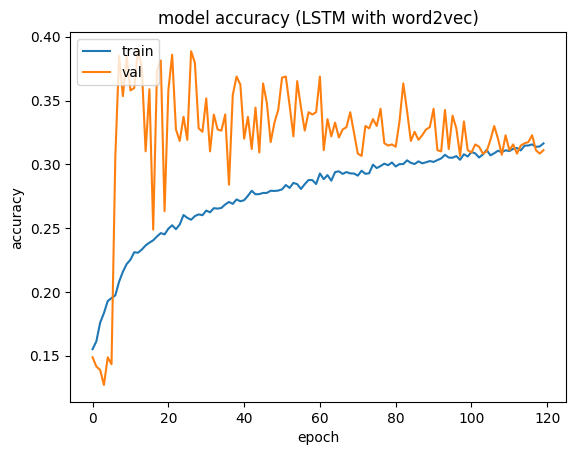

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'][:120])
plt.plot(history.history['val_accuracy'][:120])
plt.title('model accuracy (LSTM with word2vec)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

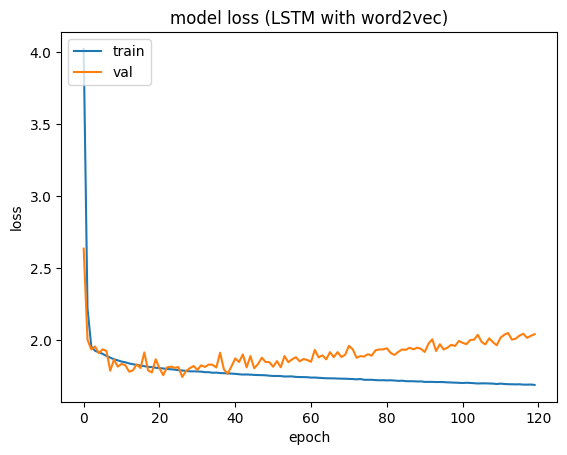

In [ ]:
plt.plot(history.history['loss'][:120])
plt.plot(history.history['val_loss'][:120])
plt.title('model loss (LSTM with word2vec)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
import keras.backend as K
#from keras import initializers, regularizers, constraints
from keras.layers import Layer
class Attention(Layer):
    def __init__(self,**kwargs):
        super(Attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(Attention,self).get_config()

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from gensim.models import Word2Vec
maxwords = 20
#sentences = ["I love this product", "This is okay", "I hate it","I do not","Oh my god","what is up with you","absolutley not","Peter go back","Omg crazy","Gosh what is it"]
#labels = np.array([0, 1, 2,1,1,0,1,2,1,1])
sentences = train_set+val_set+test_set
print(sentences)
# Tokenize the sentences

word2vec_model = Word2Vec(sentences=all_words, vector_size=100, window=5, min_count=1, workers=4)

# Tokenize the sentences using the Word2Vec model's vocabulary
tokenizer = Tokenizer()
tokenizer.word_index = {word: index + 1 for index, word in enumerate(word2vec_model.wv.index_to_key)}

#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1
print(total_words)

print("tokenizer works!")

# Convert sentences to sequences of integers
sequences_train = tokenizer.texts_to_sequences(train_set)
sequences_val = tokenizer.texts_to_sequences(val_set)
sequences_test = tokenizer.texts_to_sequences(test_set)
#print(len(sequences_train))
#print(len(sequences_val))
#print(len(sequences_test))
# Pad sequences to ensure they have the same length
padded_train = np.array(pad_sequences(sequences_train,maxwords))
padded_val = np.array(pad_sequences(sequences_val,maxwords))
padded_test = np.array(pad_sequences(sequences_test,maxwords))
print(padded_train)
'''
sequences = tokenizer.texts_to_sequences(sentences)
padded_seq = np.array(pad_sequences(sequences))
print(padded_seq)
padded_train = padded_seq[:len(train_set)]
padded_val = padded_seq[len(train_set):len(test_set)]
padded_test = padded_seq[len(test_set):]
'''



X_train = padded_train
#print(X_train)
y_train = np.array(train_labels)

X_val = padded_val
y_val = np.array(val_labels)

X_test = padded_test
y_test = np.array(test_labels)

inp = tf.keras.layers.Input(shape=(maxwords,), dtype="int32")
x = tf.keras.layers.Embedding(total_words, 256, trainable=False)(inp)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(300, return_sequences=True, dropout=0.25,recurrent_dropout=0.25))(x)
x = Attention()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Dense(3, activation="softmax")(x)
model = tf.keras.models.Model(inputs=inp, outputs=x)

model.summary()


# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model

#temptrain check

#X_val = X_train[:500]
#y_val = y_train[:500]
#callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 10, min_delta=0.0003, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_bilstmatt.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=150, validation_data=(X_val, y_val),callbacks=[model_checkpoint])
model.save("model_biLSTMatt_word2vec.h5")

# Evaluate the model on the test set
#best_model = load_model('best_model.h5')
model.load_weights('best_model_bilstmatt.h5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC curve and AUC

roc_auc = roc_auc_score(y_test, y_pred,multi_class='ovr')

In [ ]:
!ls

drive  sample_data


In [ ]:
import os
os.chdir('drive/MyDrive/sml_stuff')

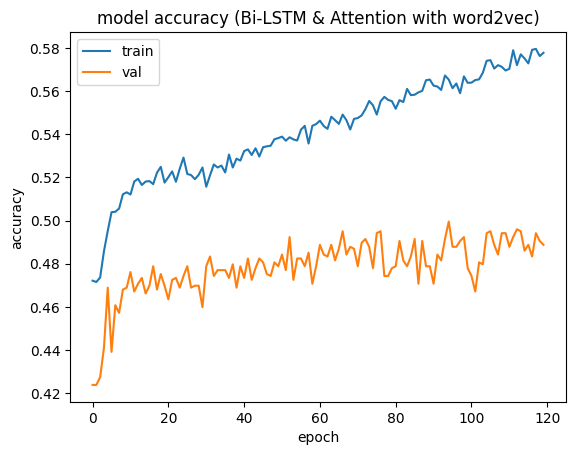

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'][:120])
plt.plot(history.history['val_accuracy'][:120])
plt.title('model accuracy (Bi-LSTM & Attention with word2vec)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

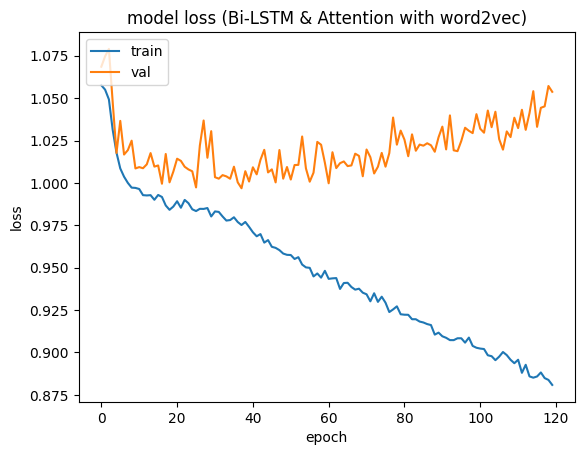

In [ ]:
plt.plot(history.history['loss'][:120])
plt.plot(history.history['val_loss'][:120])
plt.title('model loss (Bi-LSTM & Attention with word2vec)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

RNN

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE

maxwords = 20
#sentences = ["I love this product", "This is okay", "I hate it","I do not","Oh my god","what is up with you","absolutley not","Peter go back","Omg crazy","Gosh what is it"]
#labels = np.array([0, 1, 2,1,1,0,1,2,1,1])
sentences = train_set+val_set+test_set
print(sentences)
# Tokenize the sentences

word2vec_model = Word2Vec(sentences=all_words, vector_size=100, window=5, min_count=1, workers=4)

# Tokenize the sentences using the Word2Vec model's vocabulary
tokenizer = Tokenizer()
tokenizer.word_index = {word: index + 1 for index, word in enumerate(word2vec_model.wv.index_to_key)}

#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1
print(total_words)

print("tokenizer works!")

# Convert sentences to sequences of integers
sequences_train = tokenizer.texts_to_sequences(train_set)
sequences_val = tokenizer.texts_to_sequences(val_set)
sequences_test = tokenizer.texts_to_sequences(test_set)
#print(len(sequences_train))
#print(len(sequences_val))
#print(len(sequences_test))
# Pad sequences to ensure they have the same length
padded_train = np.array(pad_sequences(sequences_train,maxwords))
padded_val = np.array(pad_sequences(sequences_val,maxwords))
padded_test = np.array(pad_sequences(sequences_test,maxwords))
print(padded_train)
'''
sequences = tokenizer.texts_to_sequences(sentences)
padded_seq = np.array(pad_sequences(sequences))
print(padded_seq)
padded_train = padded_seq[:len(train_set)]
padded_val = padded_seq[len(train_set):len(test_set)]
padded_test = padded_seq[len(test_set):]
'''



X_train = padded_train
#print(X_train)
y_train = np.array(train_labels)


smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_val = padded_val
y_val = np.array(val_labels)

X_test = padded_test
y_test = np.array(test_labels)

# Split the data into training, validation, and test sets
#X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
#print(padded_sequences)
# Define the RNN model
#from tf.keras.regularizers import l2
#from tf.keras.layers.normalization import BatchNormalization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=32, input_length=maxwords),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(100,kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')  # Assuming 7 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

RNN

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE
maxwords = 20
#sentences = ["I love this product", "This is okay", "I hate it","I do not","Oh my god","what is up with you","absolutley not","Peter go back","Omg crazy","Gosh what is it"]
#labels = np.array([0, 1, 2,1,1,0,1,2,1,1])
sentences = train_set+val_set+test_set
print(sentences)
# Tokenize the sentences

word2vec_model = Word2Vec(sentences=all_words, vector_size=100, window=5, min_count=1, workers=4)

# Tokenize the sentences using the Word2Vec model's vocabulary
tokenizer = Tokenizer()
tokenizer.word_index = {word: index + 1 for index, word in enumerate(word2vec_model.wv.index_to_key)}

#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1
print(total_words)

print("tokenizer works!")

# Convert sentences to sequences of integers
sequences_train = tokenizer.texts_to_sequences(train_set)
sequences_val = tokenizer.texts_to_sequences(val_set)
sequences_test = tokenizer.texts_to_sequences(test_set)
#print(len(sequences_train))
#print(len(sequences_val))
#print(len(sequences_test))
# Pad sequences to ensure they have the same length
padded_train = np.array(pad_sequences(sequences_train,maxwords))
padded_val = np.array(pad_sequences(sequences_val,maxwords))
padded_test = np.array(pad_sequences(sequences_test,maxwords))
print(padded_train)
'''
sequences = tokenizer.texts_to_sequences(sentences)
padded_seq = np.array(pad_sequences(sequences))
print(padded_seq)
padded_train = padded_seq[:len(train_set)]
padded_val = padded_seq[len(train_set):len(test_set)]
padded_test = padded_seq[len(test_set):]
'''



X_train = padded_train
#print(X_train)
y_train = np.array(train_labels)


smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_val = padded_val
y_val = np.array(val_labels)

X_test = padded_test
y_test = np.array(test_labels)

# Split the data into training, validation, and test sets
#X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
#print(padded_sequences)
# Define the RNN model
#from tf.keras.regularizers import l2
#from tf.keras.layers.normalization import BatchNormalization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=32, input_length=maxwords),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.SimpleRNN(100,kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')  # Assuming 3 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])




['also I point person companys transition KL5 GR6 system', 'You mustve hands full', 'That I That I', 'So lets talk little bit duties', 'My duties All right', 'Now youll heading whole division youll lot duties', 'I see', 'But therell perhaps 30 people dump certain amount', 'Good know', 'We go detail', 'No dont I beg', 'All right well definite answer Monday I think I say confidence youll fit well', 'Really', 'Absolutely You relax', 'But The waitress I went last month', 'You know Forget', 'Nononono Who talking', 'No IIII dont I actually dont know', 'Ok', 'All right well', 'Yeah sure', 'Hey Mon', 'Heyheyhey You wanna hear something sucks', 'Do I ever', 'Chris says theyre closing bar', 'No way', 'Yeah apparently theyre turning kinda coffee place', 'Just coffee Where gonna hang', 'Got', 'Can I get beer', 'Hey pick roommate', 'You betcha', 'Is Italian guy', 'Ummm yeah right', 'Oh God oh God Poor Monica', 'What', 'What', 'He wrote poem', 'Look My vessel empty nothing inside', 'Now Ive touched 

In [ ]:
# Train the model

#temptrain check

#X_val = X_train[:500]
#y_val = y_train[:500]
#callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 10, min_delta=0.0003, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_rnn.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=150, validation_data=(X_val, y_val),callbacks=[model_checkpoint])
model.save("model_RNN_word2vec.h5")

# Evaluate the model on the test set
#best_model = load_model('best_model.h5')
model.load_weights('best_model_rnn.h5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC curve and AUC

roc_auc = roc_auc_score(y_test, y_pred,multi_class='ovr')

Epoch 1/150
1031/1031 [==============================] - 39s 36ms/step - loss: 2.7952 - accuracy: 0.1507 - val_loss: 2.4532 - val_accuracy: 0.1479
Epoch 2/150
   4/1031 [..............................] - ETA: 21s - loss: 2.4534 - accuracy: 0.1328

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1031/1031 [==============================] - 31s 30ms/step - loss: 2.2480 - accuracy: 0.1639 - val_loss: 2.1225 - val_accuracy: 0.1560
Epoch 3/150
1031/1031 [==============================] - 32s 31ms/step - loss: 2.0269 - accuracy: 0.1840 - val_loss: 1.9852 - val_accuracy: 0.1434
Epoch 4/150
1031/1031 [==============================] - 36s 35ms/step - loss: 1.9559 - accuracy: 0.1927 - val_loss: 1.9340 - val_accuracy: 0.1416
Epoch 5/150
1031/1031 [==============================] - 30s 29ms/step - loss: 1.9290 - accuracy: 0.1949 - val_loss: 1.9370 - val_accuracy: 0.1830
Epoch 6/150
1031/1031 [==============================] - 31s 30ms/step - loss: 1.9088 - accuracy: 0.2032 - val_loss: 1.8627 - val_accuracy: 0.2254
Epoch 7/150
1031/1031 [==============================] - 28s 27ms/step - loss: 1.8851 - accuracy: 0.2123 - val_loss: 1.8549 - val_accuracy: 0.3571
Epoch 8/150
1031/1031 [==============================] - 28s 27ms/step - loss: 1.8648 - accuracy: 0.2245 - val_loss: 1.8524 - val_

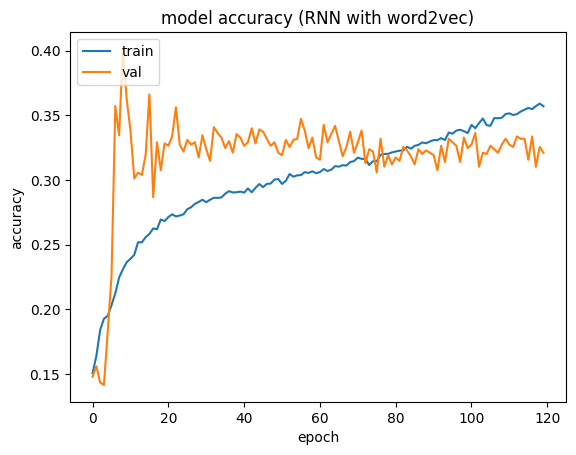

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'][:120])
plt.plot(history.history['val_accuracy'][:120])
plt.title('model accuracy (RNN with word2vec)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('best_model_rnn.h5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC curve and AUC

roc_auc = roc_auc_score(y_test, y_pred,multi_class='ovr')
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][:120])
plt.plot(history.history['val_loss'][:120])
plt.title('model loss (RNN with word2vec)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

82/82 [==============================] - 1s 8ms/step - loss: 1.7397 - accuracy: 0.3969
Test Loss: 1.739657998085022, Test Accuracy: 0.3969348669052124
82/82 [==============================] - 1s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.77      0.62      1256
           1       0.12      0.23      0.16       281
           2       0.03      0.10      0.05        50
           3       0.00      0.00      0.00       208
           4       0.00      0.00      0.00       402
           5       0.02      0.01      0.02        68
           6       0.11      0.01      0.01       345

    accuracy                           0.40      2610
   macro avg       0.11      0.16      0.12      2610
weighted avg       0.28      0.40      0.32      2610



NameError: ignored